In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc


In [105]:
prob = "Pendulum_xyomega"
window_size = 10
nb_episodes = 300


In [106]:
def compute_auc_and_std(data, nb_episodes):
    # data = np.load(filepath, allow_pickle=True)
    all_returns = data['episode_rewards']  # shape: (n_seeds, n_episodes)
    # print("all_returns ", all_returns, "\n")
    
    # print("all_returns shape:", all_returns.shape, "\n")
    aucs = []
    for rewards in all_returns:
        returns = rewards[:nb_episodes]
        x = np.arange(len(returns))
        aucs.append(auc(x, returns))

    auc_mean = np.mean(aucs)
    auc_std = np.std(aucs)
    return auc_mean, auc_std



In [107]:
base_path = f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\Files\\Results\\{prob}"



QRNN-ASGNN-PF: AUC = -57228.51 ± 7955.97
QRNN-basic-PF: AUC = -62423.38 ± 5255.86
QRNN-random-PF: AUC = -48334.66 ± 2051.91
QRNN-RS: AUC = -67757.61 ± 2708.83
QRNN-ASGNN-CEM: AUC = -535735.77 ± 10032.36
QRNN-basic-CEM: AUC = -535268.56 ± 9116.50
QRNN-random-CEM: AUC = -47382.41 ± 2580.26
50NN-ASGNN-PF: AUC = -73612.35 ± 9226.51
50NN-basic-PF: AUC = -444781.26 ± 4779.90
50NN-random-PF: AUC = -54983.23 ± 8619.08
50NN-RS: AUC = -78347.40 ± 3892.22
50NN-ASGNN-CEM: AUC = -532638.84 ± 10619.07
50NN-basic-CEM: AUC = -374486.07 ± 87569.26
50NN-random-CEM: AUC = -55279.43 ± 3055.49
MSENN-ASGNN-PF: AUC = -61372.82 ± 5931.61
MSENN-basic-PF: AUC = -75304.65 ± 13082.64
MSENN-random-PF: AUC = -49745.17 ± 2413.38
MSENN-RS: AUC = -73355.04 ± 2889.18
MSENN-ASGNN-CEM: AUC = -528449.73 ± 11994.52
MSENN-basic-CEM: AUC = -521272.86 ± 11508.91
MSENN-random-CEM: AUC = -47665.20 ± 4816.93
MSENN-EvoCEM: AUC = -38732.02 ± 2022.61
A2C: AUC = -451368.83 ± 22318.99
PPO: AUC = -352662.60 ± 7208.55
DDPG: AUC = -5903

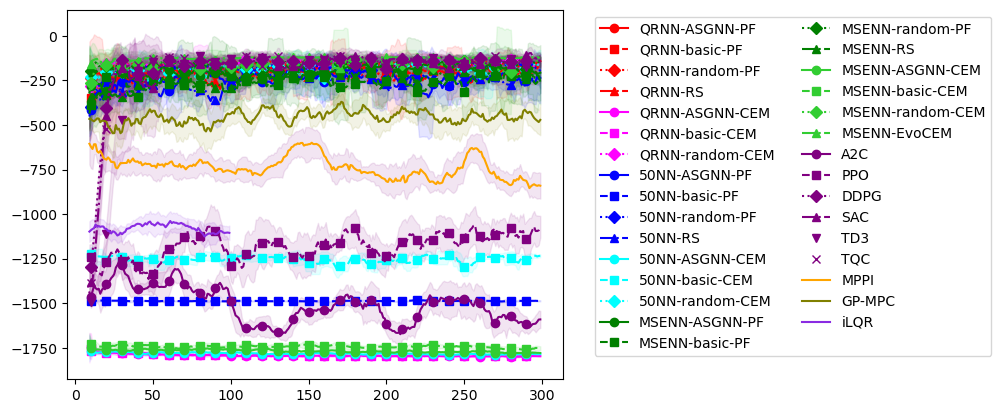

In [108]:
QRNN = {'QRNN-ASGNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-random-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

QRNN_CEM = {'QRNN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-random-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',
    # 'QRNN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_EvoCEM_mid_May6_EvoCEM.npz",
    }
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# ####################################################
FiftyNN = {'50NN-ASGNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-random-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

FiftyNN_CEM = {'50NN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-random-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',
    # '50NN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_50NN_EvoCEM_mid_May6_EvoCEM.npz",
}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# ####################################################
MSENN = {'MSENN-ASGNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-random-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz',}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

MSENN_CEM = {'MSENN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-random-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',
    'MSENN-EvoCEM': f"{base_path}\\{prob}_MPC_MSENN_EvoCEM_mid_May6_EvoCEM.npz",}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]

    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# # ####################################################
# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:300]
#     std_rewards = data['std_rewards'][:300]

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     plt.plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     plt.fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color='red', alpha=0.1)
#     it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
prob_RL = "Pendulum"
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_PPO_results.npz',
    'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_DDPG_results.npz',
    'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_SAC_results.npz',
    'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_TD3_results.npz',
    'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    plt.plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    plt.fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

########################
Control_methods = {'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_RL}_MPPI_results.npz',
    'GP-MPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_RL}_GP-MPC_results_old.npz',
    'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    # 'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_PPO_results.npz',

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
# color_PETSCEM = 'brown'

MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards']
std_returns_MPPI = MPPI_data['std_rewards']
# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

GPMPC_data = np.load(Control_methods['GP-MPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards']
std_returns_GPMPC = GPMPC_data['std_rewards']
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

iLQR_data = np.load(Control_methods['iLQR'])
mean_returns_iLQR = iLQR_data['mean_rewards']
std_returns_iLQR = iLQR_data['std_rewards']
# Smooth the data
smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(iLQR_data, nb_episodes)
print(f"iLQR: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# PETSCEM_data = np.load(Control_methods['PETSCEM'])
# mean_returns_PETSCEM = PETSCEM_data['mean_rewards']
# std_returns_PETSCEM = PETSCEM_data['std_rewards']
# Smooth the data
# smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
# smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

plt.plot(smoothed_mean_MPPI, label='MPPI', color='orange')
plt.fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color='purple', alpha=0.1)
plt.plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
plt.fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)
plt.plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
plt.fill_between(range(len(smoothed_mean_iLQR)), 
                 smoothed_mean_iLQR - smoothed_std_iLQR, 
                 smoothed_mean_iLQR + smoothed_std_iLQR, 
                 color=color_iLQR, alpha=0.1)
# plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
# plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
#                  smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
#                  smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
#                  color=color_PETSCEM, alpha=0.1)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)


### Plot subfigures



In [109]:
PE_dict_auc_mean = {}
PE_dict_auc_std = {}


QRNN-ASGNN-PF: AUC = -57228.51 ± 7955.97
QRNN-basic-PF: AUC = -62423.38 ± 5255.86
QRNN-random-PF: AUC = -48334.66 ± 2051.91
QRNN-RS: AUC = -67757.61 ± 2708.83
50NN-ASGNN-PF: AUC = -73612.35 ± 9226.51
50NN-basic-PF: AUC = -444781.26 ± 4779.90
50NN-random-PF: AUC = -54983.23 ± 8619.08
50NN-RS: AUC = -78347.40 ± 3892.22
MSENN-ASGNN-PF: AUC = -61372.82 ± 5931.61
MSENN-basic-PF: AUC = -75304.65 ± 13082.64
MSENN-random-PF: AUC = -49745.17 ± 2413.38
MSENN-RS: AUC = -73355.04 ± 2889.18
############################################################# 

QRNN-ASGNN-CEM: AUC = -535735.77 ± 10032.36
QRNN-basic-CEM: AUC = -535268.56 ± 9116.50
QRNN-random-CEM: AUC = -47382.41 ± 2580.26
50NN-ASGNN-CEM: AUC = -532638.84 ± 10619.07
50NN-basic-CEM: AUC = -374486.07 ± 87569.26
50NN-random-CEM: AUC = -55279.43 ± 3055.49
MSENN-ASGNN-CEM: AUC = -528449.73 ± 11994.52
MSENN-basic-CEM: AUC = -521272.86 ± 11508.91
MSENN-random-CEM: AUC = -47665.20 ± 4816.93
##########################################################

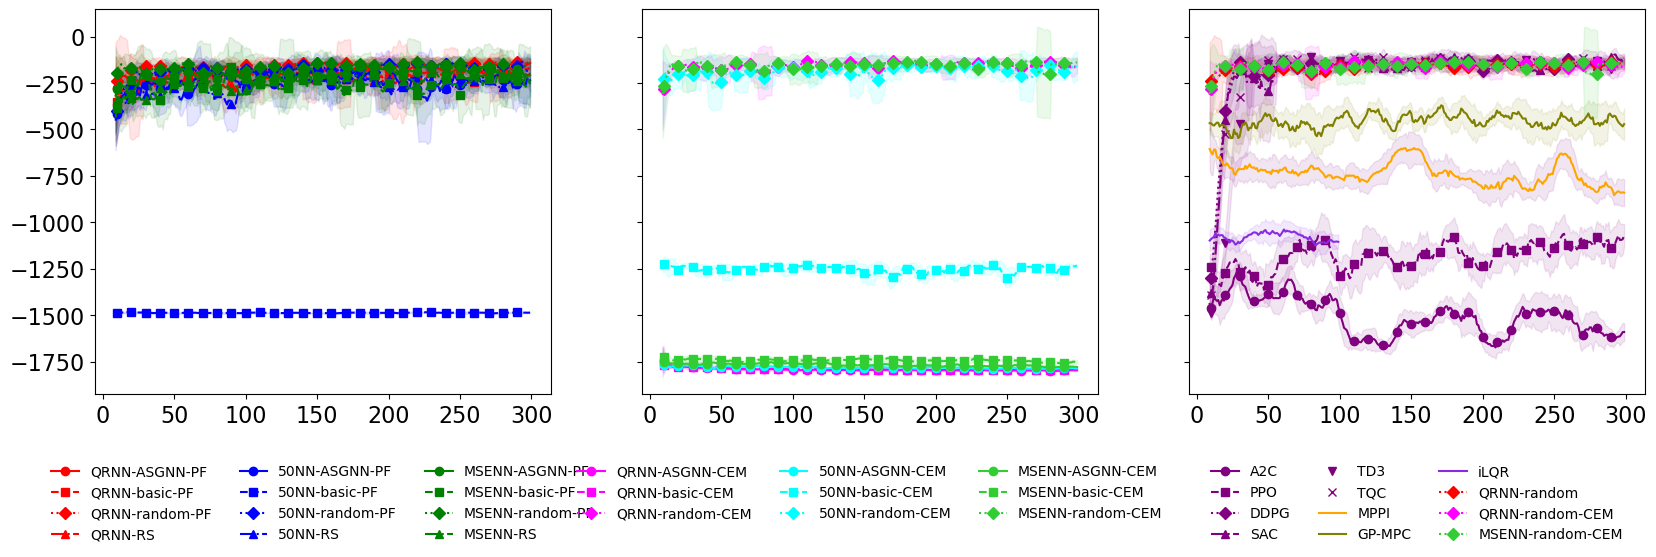

In [128]:
fig, axs = plt.subplots(1,3, figsize=(20, 5), sharey=True)

QRNN = {'QRNN-ASGNN-PF': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6.npz',
    'QRNN-basic-PF': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6.npz',
    'QRNN-random-PF': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz',
    'QRNN-RS': f'{base_path}\\{prob}_RS_mid_QRNN_May6.npz',}
color = 'red'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

FiftyNN = {'50NN-ASGNN-PF': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6.npz',
    '50NN-basic-PF': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6.npz',
    '50NN-random-PF': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6.npz',
    '50NN-RS': f'{base_path}\\{prob}_RS_mid_50NN_May6.npz',}
color = 'blue'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

############################################################################

MSENN = {'MSENN-ASGNN-PF': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6.npz',
    'MSENN-basic-PF': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6.npz',
    'MSENN-random-PF': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6.npz',
    'MSENN-RS': f'{base_path}\\{prob}_RS_mid_MSENN_May6.npz'}
color = 'green'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[0].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[0].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

# from matplotlib.lines import Line2D

# custom_legend = [
#     Line2D([0], [0], color='red', lw=2, label='QRNN'),
#     Line2D([0], [0], color='blue', lw=2, label='50NN'),
#     Line2D([0], [0], color='green', lw=2, label='MSENN'),
#     Line2D([0], [0], color='black', marker='o', linestyle='None', markersize=6, label='ASGNN'),
#     Line2D([0], [0], color='black', marker='s', linestyle='None', markersize=6, label='QRNN-CEM'),
#     Line2D([0], [0], color='black', marker='^', linestyle='None', markersize=6, label='50NN-CEM')
# ]

# axs[0].legend(handles=custom_legend, loc='upper center', bbox_to_anchor=(0.5, -0.2),
#               ncol=3, fontsize=10, frameon=False)


###########################################################

print("############################################################# \n")

QRNN_CEM = {'QRNN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_QRNN_ASGNN_mid_May6_CEM.npz',
    'QRNN-basic-CEM': f'{base_path}\\{prob}_MPC_QRNN_basic_mid_May6_CEM.npz',
    'QRNN-random-CEM': f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz',
    # 'QRNN_EvoCEM': f"C:\\Users\\nicle\\Desktop\\QRNN-MPC\\{prob}_MPC_QRNN_EvoCEM_mid_May6_EvoCEM.npz",
    }
color = 'magenta'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in QRNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################################################

FiftyNN_CEM = {'50NN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_50NN_ASGNN_mid_May6_CEM.npz',
    '50NN-basic-CEM': f'{base_path}\\{prob}_MPC_50NN_basic_mid_May6_CEM.npz',
    '50NN-random-CEM': f'{base_path}\\{prob}_MPC_50NN_random_mid_May6_CEM.npz',}
color = 'aqua'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in FiftyNN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


########################################################

MSENN_CEM = {'MSENN-ASGNN-CEM': f'{base_path}\\{prob}_MPC_MSENN_ASGNN_mid_May6_CEM.npz',
    'MSENN-basic-CEM': f'{base_path}\\{prob}_MPC_MSENN_basic_mid_May6_CEM.npz',
    'MSENN-random-CEM': f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz',}
color = 'limegreen'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in MSENN_CEM.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[1].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[1].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1
# axs[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)

#############################################################

print("############################################################# \n")

# DQN_methods = {'DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_DQN_results.npz',
#     'IV-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_IV_DQN_results.npz',
#     'QR-DQN': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob}_QR_DQN_results.npz',
#     }

# color = 'black'
# # Assign markers and linestyles to sub-methods
# markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns
# it = 0
# for label, filepath in DQN_methods.items():
#     data = np.load(filepath)
#     mean_rewards = data['mean_rewards'][:nb_episodes]
#     std_rewards = data['std_rewards'][:nb_episodes]
    
#     # print("mean_rewards ", data['ep[]'], "\n")
#     auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
#     print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

#     # if it == 0:
#     #     print(mean_rewards)
#     #     print(std_rewards)
    
#     # Smooth the data
#     smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
#     smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
#     # Plot
#     axs[2].plot(smoothed_mean, 
#              label=f"{label}", 
#              color=color,
#              marker=markers[it],
#              linestyle=linestyles[it],
#              markevery=10)  # Show markers every 10 points
    
#     # Confidence interval (optional)
#     axs[2].fill_between(range(len(mean_rewards)), 
#                      smoothed_mean - smoothed_std, 
#                      smoothed_mean + smoothed_std, 
#                      color=color, alpha=0.1)
#     it += 1
# # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

########################
########################
prob_RL = "Pendulum"
RL_methods = {'A2C': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_A2C_results.npz',
    'PPO': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_PPO_results.npz',
    'DDPG': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_DDPG_results.npz',
    'SAC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_SAC_results.npz',
    'TD3': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_TD3_results.npz',
    'TQC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\{prob_RL}_TQC_results.npz',
    
    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color = 'purple'
# Assign markers and linestyles to sub-methods
markers = ['o', 's', 'D', '^', 'v', 'x', '*']  # Add more if needed
linestyles = ['-', '--', ':', '-.', ' ', '', (0, (3, 1, 1, 1))]  # Custom patterns
it = 0
for label, filepath in RL_methods.items():
    data = np.load(filepath)
    mean_rewards = data['mean_rewards'][:nb_episodes]
    std_rewards = data['std_rewards'][:nb_episodes]
    
    auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
    print(f"{label}: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
    PE_dict_auc_mean[label] = auc_mean
    PE_dict_auc_std[label] = auc_std

    # if it == 0:
    #     print(mean_rewards)
    #     print(std_rewards)
    
    # Smooth the data
    smoothed_mean = pd.Series(mean_rewards).rolling(window=window_size).mean()
    smoothed_std = pd.Series(std_rewards).rolling(window=window_size).std()
    
    # Plot
    axs[2].plot(smoothed_mean, 
             label=f"{label}", 
             color=color,
             marker=markers[it],
             linestyle=linestyles[it],
             markevery=10)  # Show markers every 10 points
    
    # Confidence interval (optional)
    axs[2].fill_between(range(len(mean_rewards)), 
                     smoothed_mean - smoothed_std, 
                     smoothed_mean + smoothed_std, 
                     color=color, alpha=0.1)
    it += 1

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)

########################
Control_methods = {'MPPI': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\MPPI\\{prob_RL}_MPPI_results.npz',
    'GP-MPC': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\GP_MPC\\{prob_RL}_GP-MPC_results_old.npz',
    'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr_s\\{prob_RL}_iLQR_results.npz',
    # 'iLQR': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\ilqr\\{prob_RL}_iLQR_results.npz',
    # 'PETSCEM': f'C:\\Users\\nicle\\Desktop\\QRNN-MPC\\sb3\\CartPole_PPO_results.npz',

    # 'A2C': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_A2C_results.npz',
    # # 'DDPG': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_DDPG_results.npz',
    # 'PPO': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_PPO_results.npz',
    # # 'SAC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_SAC_results.npz',
    # # 'TD3': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TD3_results.npz',
    # # 'TQC': f'C:\\Users\\nicle\\Desktop\\GPBO-MBRL\\GP-MPC_NL\\PF_MPC_GP_Env\\ParallelOverParticles\\Jan24\\April 4th tests\\QRNN-MPC-main\\QRNN-MPC-main\\Files\\{prob}_TQC_results.npz',
    }

color_MPPI = 'orange'
color_GPMPC = 'Olive'
color_iLQR = 'blueviolet'
color_PETSCEM = 'brown'

MPPI_data = np.load(Control_methods['MPPI'])
mean_returns_MPPI = MPPI_data['mean_rewards']
std_returns_MPPI = MPPI_data['std_rewards']
# Smooth the data
smoothed_mean_MPPI = pd.Series(mean_returns_MPPI).rolling(window=window_size).mean()
smoothed_std_MPPI = pd.Series(std_returns_MPPI).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(MPPI_data, nb_episodes)
print(f"MPPI: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PE_dict_auc_mean['MPPI'] = auc_mean
PE_dict_auc_std['MPPI'] = auc_std

GPMPC_data = np.load(Control_methods['GP-MPC'])
mean_returns_GPMPC = GPMPC_data['mean_rewards']
std_returns_GPMPC = GPMPC_data['std_rewards']
# Smooth the data
smoothed_mean_GPMPC = pd.Series(mean_returns_GPMPC).rolling(window=window_size).mean()
smoothed_std_GPMPC = pd.Series(std_returns_GPMPC).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(GPMPC_data, nb_episodes)
print(f"GP-MPC: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PE_dict_auc_mean['GP-MPC'] = auc_mean
PE_dict_auc_std['GP-MPC'] = auc_std

iLQR_data = np.load(Control_methods['iLQR'])
mean_returns_iLQR = iLQR_data['mean_rewards']
std_returns_iLQR = iLQR_data['std_rewards']
# Smooth the data
smoothed_mean_iLQR = pd.Series(mean_returns_iLQR).rolling(window=window_size).mean()
smoothed_std_iLQR = pd.Series(std_returns_iLQR).rolling(window=window_size).std()

auc_mean, auc_std = compute_auc_and_std(iLQR_data, nb_episodes)
print(f"iLQR: AUC = {auc_mean:.2f} ± {auc_std:.2f}")
PE_dict_auc_mean['iLQR'] = auc_mean
PE_dict_auc_std['iLQR'] = auc_std

# PETSCEM_data = np.load(Control_methods['PETSCEM'])
# mean_returns_PETSCEM = PETSCEM_data['mean_rewards']
# std_returns_PETSCEM = PETSCEM_data['std_rewards']
# Smooth the data
# smoothed_mean_PETSCEM = pd.Series(mean_returns_PETSCEM).rolling(window=window_size).mean()
# smoothed_std_PETSCEM = pd.Series(std_returns_PETSCEM).rolling(window=window_size).std()

axs[2].plot(smoothed_mean_MPPI, label='MPPI', color='orange')
axs[2].fill_between(range(len(smoothed_mean_MPPI)), 
                 smoothed_mean_MPPI - smoothed_std_MPPI, 
                 smoothed_mean_MPPI + smoothed_std_MPPI, 
                 color='purple', alpha=0.1)
axs[2].plot(smoothed_mean_GPMPC, label='GP-MPC', color=color_GPMPC)
axs[2].fill_between(range(len(smoothed_mean_GPMPC)), 
                 smoothed_mean_GPMPC - smoothed_std_GPMPC, 
                 smoothed_mean_GPMPC + smoothed_std_GPMPC, 
                 color=color_GPMPC, alpha=0.1)
axs[2].plot(smoothed_mean_iLQR, label='iLQR', color=color_iLQR)
axs[2].fill_between(range(len(smoothed_mean_iLQR)), 
                 smoothed_mean_iLQR - smoothed_std_iLQR, 
                 smoothed_mean_iLQR + smoothed_std_iLQR, 
                 color=color_iLQR, alpha=0.1)
# plt.plot(smoothed_mean_PETSCEM, label='PETSCEM', color=color_PETSCEM)
# plt.fill_between(range(len(smoothed_mean_PETSCEM)), 
#                  smoothed_mean_PETSCEM - smoothed_std_PETSCEM, 
#                  smoothed_mean_PETSCEM + smoothed_std_PETSCEM, 
#                  color=color_PETSCEM, alpha=0.1)


markers = ['o', 's', 'D', '^', 'v', 'x', '*']
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))]  # Custom patterns

# QRNN random
color_QRNN_rnd = 'red'
marker_QRNN_rnd = markers[2]
linestyle_QRNN_rnd = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6.npz')
mean_rewards_QRNN_rnd = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_rnd = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-random: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_rnd = pd.Series(mean_rewards_QRNN_rnd).rolling(window=window_size).mean()
smoothed_std_QRNN_rnd = pd.Series(std_rewards_QRNN_rnd).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_rnd, 
            label="QRNN-random", 
            color=color_QRNN_rnd,
            marker=marker_QRNN_rnd,
            linestyle=linestyle_QRNN_rnd,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_rnd)), 
                    smoothed_mean_QRNN_rnd - smoothed_std_QRNN_rnd, 
                    smoothed_mean_QRNN_rnd + smoothed_std_QRNN_rnd, 
                    color=color_QRNN_rnd, alpha=0.1)


# QRNN_random_CEM
color_QRNN_rnd_CEM = 'magenta'
marker_QRNN_rnd_CEM = markers[2]
linestyle_QRNN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_QRNN_random_mid_May6_CEM.npz')
mean_rewards_QRNN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_QRNN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"QRNN-random-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_QRNN_rnd_CEM = pd.Series(mean_rewards_QRNN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_QRNN_rnd_CEM = pd.Series(std_rewards_QRNN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_QRNN_rnd_CEM, 
            label="QRNN-random-CEM", 
            color=color_QRNN_rnd_CEM,
            marker=marker_QRNN_rnd_CEM,
            linestyle=linestyle_QRNN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_QRNN_rnd_CEM)), 
                    smoothed_mean_QRNN_rnd_CEM - smoothed_std_QRNN_rnd_CEM, 
                    smoothed_mean_QRNN_rnd_CEM + smoothed_std_QRNN_rnd_CEM, 
                    color=color_QRNN_rnd_CEM, alpha=0.1)

# MSENN_rnd_CEM
color_MSENN_rnd_CEM = 'limegreen'
marker_MSENN_rnd_CEM = markers[2]
linestyle_MSENN_rnd_CEM = linestyles[2]
data = np.load(f'{base_path}\\{prob}_MPC_MSENN_random_mid_May6_CEM.npz')
mean_rewards_MSENN_rnd_CEM = data['mean_rewards'][:nb_episodes]
std_rewards_MSENN_rnd_CEM = data['std_rewards'][:nb_episodes]

auc_mean, auc_std = compute_auc_and_std(data, nb_episodes)
print(f"MSENN-random-CEM: AUC = {auc_mean:.2f} ± {auc_std:.2f}")

# Smooth the data
smoothed_mean_MSENN_rnd_CEM = pd.Series(mean_rewards_MSENN_rnd_CEM).rolling(window=window_size).mean()
smoothed_std_MSENN_rnd_CEM = pd.Series(std_rewards_MSENN_rnd_CEM).rolling(window=window_size).std()

# Plot
axs[2].plot(smoothed_mean_MSENN_rnd_CEM, 
            label="MSENN-random-CEM", 
            color=color_MSENN_rnd_CEM,
            marker=marker_MSENN_rnd_CEM,
            linestyle=linestyle_MSENN_rnd_CEM,
            markevery=10)  # Show markers every 10 points

# Confidence interval (optional)
axs[2].fill_between(range(len(mean_rewards_MSENN_rnd_CEM)), 
                    smoothed_mean_MSENN_rnd_CEM - smoothed_std_MSENN_rnd_CEM, 
                    smoothed_mean_MSENN_rnd_CEM + smoothed_std_MSENN_rnd_CEM, 
                    color=color_MSENN_rnd_CEM, alpha=0.1)



# axs[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left',ncol=2)
axs[2].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=10, frameon=False)
plt.rcParams.update({'font.size': 15})


In [111]:
import json

# writing dictionary to a file as JSON
with open('PE_auc_mean.json', 'w') as f:
    json.dump(PE_dict_auc_mean, f)

with open('PE_auc_std.json', 'w') as f:
    json.dump(PE_dict_auc_std, f)


In [112]:
PE_dict_auc_mean, PE_dict_auc_std


({'QRNN-ASGNN-PF': -57228.50826854107,
  'QRNN-basic-PF': -62423.37654462804,
  'QRNN-random-PF': -48334.659356172815,
  'QRNN-RS': -67757.60964629163,
  '50NN-ASGNN-PF': -73612.34924983566,
  '50NN-basic-PF': -444781.2621191532,
  '50NN-random-PF': -54983.228779074045,
  '50NN-RS': -78347.40295715639,
  'MSENN-ASGNN-PF': -61372.824071971554,
  'MSENN-basic-PF': -75304.64882966381,
  'MSENN-random-PF': -49745.168145993455,
  'MSENN-RS': -73355.0358720127,
  'QRNN-ASGNN-CEM': -535735.7687672438,
  'QRNN-basic-CEM': -535268.5643888818,
  'QRNN-random-CEM': -47382.41367748069,
  '50NN-ASGNN-CEM': -532638.8372551404,
  '50NN-basic-CEM': -374486.0650187358,
  '50NN-random-CEM': -55279.42628390979,
  'MSENN-ASGNN-CEM': -528449.7301888854,
  'MSENN-basic-CEM': -521272.8572215845,
  'MSENN-random-CEM': -47665.19600989739,
  'A2C': -451368.8298865,
  'PPO': -352662.59509316663,
  'DDPG': -59032.27204233333,
  'SAC': -62037.704066000006,
  'TD3': -70801.91182233334,
  'TQC': -60611.833833833334,